In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sporgboost.preprocessing import onehot_encode, shuffle
from sporgboost.common import best_split

In [3]:
# Dataset for testing
X, y = load_iris(return_X_y = True)

# Set seed to be able to reproduce
np.random.seed(1234)
    
# Preprocessing
y = onehot_encode(y)
X, y = shuffle(X, y)

In [18]:
from sporgboost.common import gini_impurity
from sporgboost.utils import row_mean
from sporgboost.projections import Identity

class DecisionTree():
    def fit(self, X, y, proj = Identity):
        self.tree = _grow_tree(X, y, proj)
        self.n_classes = y.shape[1]

    def predict(self, X):
        return _predict(self.tree, X, self.n_classes)

def _grow_tree(X, y, proj):
    X_, mapping = proj().fit_map(X, y)

    col, split = best_split(X_, y)
    out = {'proj' : mapping[col, :], 'split' : split}
    le = (X_ <= split)

    # Compute new split predictions
    pred_left = row_mean(y[le, :]).reshape((1, -1))
    pred_right = row_mean(y[~le, :]).reshape((1, -1))

    if gini_impurity(pred_left) == 0:
        # Return leaf value
        out['left'] = pred_left
    else:
        # Grow another decision stump
        out['left'] = _grow_tree(X[le, :], y[le, :])

    if gini_impurity(pred_right) <= .01:
        # Return leaf value
        out['right'] = pred_right
    else:
        pass
        out['right'] = _grow_tree(X[~le, :], y[~le, :])
    
    return(out)

def _predict(tree, X, n_classes):
    # If we are at a leaf, return the value
    if isinstance(tree, np.ndarray):
        return tree

    # Decision Stump, keep parsing
    # Project X, then compare against split value
    X_ = X @ tree['proj']
    le = X_ <= tree['split']
    out = np.empty(shape=(X.shape[0], n_classes))
    out[le, :] = _predict(tree['left'], X[le], n_classes)
    out[~le, :] = _predict(tree['right'], X[~le], n_classes)
    
    return out

model = DecisionTree()
model.fit(X, y)

AttributeError: 'Identity' object has no attribute 'fit_map'

In [14]:
%timeit model.fit(X, y)

1.57 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
%timeit model.predict(X)

89.6 µs ± 535 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%timeit sktree.fit(X, y)

306 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit sktree.predict(X)

70.7 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
from sklearn.tree import DecisionTreeClassifier
sktree = DecisionTreeClassifier(
    
)
sktree.fit(X, y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.444\nsamples = 150\nvalue = [[100, 50]\n[100, 50]\n[100, 50]]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [[0, 50]\n[50, 0]\n[50, 0]]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.333\nsamples = 100\nvalue = [[100, 0]\n[50, 50]\n[50, 50]]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.112\nsamples = 54\nvalue = [[54, 0]\n[5, 49]\n[49, 5]]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.027\nsamples = 48\nvalue = [[48, 0]\n[1, 47]\n[47, 1]]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [[47, 0]\n[0, 47]\n[47, 0]]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.296\nsamples = 6\nvalue = [[6, 0]\n[4, 2]\n[2, 4]]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[0, 

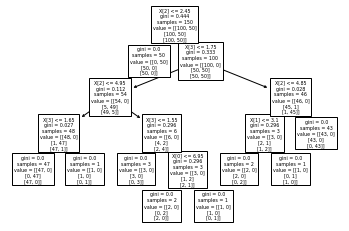

In [118]:
from sklearn.tree import plot_tree
plot_tree(sktree)

In [203]:
y_ = onehot_encode(np.array([0,0,0,0,0,1,1,1,1,1]))
X_ = np.array([
    [0,33],
    [0,54],
    [0,56],
    [0,42],
    [1,50],
    [1,55],
    [1,31],
    [0,-4],
    [1,77],
    [0,49]
    ])


find_split_feat(X_[:,1], y_)

(array([-4, 31, 33, 42, 49, 50, 54, 55, 56]),
 array([0.44444444, 0.375     , 0.47619048, 0.5       , 0.48      ,
        0.5       , 0.47619048, 0.5       , 0.44444444]))

In [9]:
# from numba.experimental import jitclass
# from numba import float32, int16
# from sporgboost.projections import Identity
# from sporgboost.common import gini_impunity
# from sporgboost.utils import row_mean

# class DecisionStump():
#     def __init__(self,
#                  base_proj = Identity,
#                  **kwargs
#                 ):
#         self.base_proj = base_proj
#         self.proj = base_proj()
    
#     def fit(self, X, y):
#         # General info
#         self.n_classes = y.shape[1]
        
#         # Project the data onto a new hyperplane
#         self.proj.fit(X, y)
#         X_proj = self.proj.transform(X)
        
#         # Set the split col and value
#         self.col_idx, self.value = best_split(X_proj, y)
#         self.proj.select(self.col_idx)
        
#         # Check partitions for impunity and decide if we are adding a leaf or another stump
#         le = (X_proj[:, self.col_idx] <= self.value)
#         left_value = row_mean(y[le])
#         right_value = row_mean(y[~le])

#         if (le.sum() == X.shape[0]) or (le.sum() == 0):
#             raise ValueError(f"One partition is entirely empty, returning diagnostic info"
#                              f"\nX:\n{X}\ny:\n{y}\ncol_idx={self.col_idx}\nsplit_value={self.value}"
#                              f"\nfind_split_info={find_split(X_proj, y)}"
#                             )
            
#         if left_value.max() == 1:
#             self.left = left_value  
#         else:
#             self.left = DecisionStump(proj = self.proj).fit(X[le], y[le])
            
#         if right_value.max() == 1:
#             self.right = right_value 
#         else:
#             self.right = DecisionStump(proj = self.proj).fit(X[~le], y[~le])

#         return self
    
#     def predict(self, X):
#         X_proj = self.proj.transform(X)
#         y_pred = np.empty((X.shape[0], self.n_classes), 'float32')
        
#         le = (X_proj <= self.value).flatten()
#         if isinstance(self.left, DecisionStump):
#             y_pred[le, :] = self.left.predict(X[le])
#         else:
#             y_pred[le, :] = self.left
        
#         if isinstance(self.right, DecisionStump):
#             y_pred[~le, :] = self.right.predict(X[~le])
#         else:
#             y_pred[~le, :] = self.right
            
#         y_pred[X_proj > self.value] = self.right.predict(X[X_proj > self.value])
#         return(y_pred)

In [39]:
# %%time
# test = DecisionStump()
# test.fit(X, y)